### Imbalanced dataset
* 라벨값이 상당히 적은 dataset
* 적절한 performance metric을 선정 -> precision,recall,AUC 가 적절
* 적절한 training dataset의 resampling -> over,undersampling, data augmentation
* Ensemble

### Data resampling
* 8:2 의 데이터를 1:1로 학습후 다시 8:2의 테스트셋으로 테스트

### imbalanced-learn
* scikit-learn의 imbalanced dataset 확장 모듈
* under sampling, over samplingm, SMOTE 등 제공

### 과정
* 전체 dataset에서 test와 dev set을 나눈다
* dev set으로 under, 또는 oversampling
* 모델의 생성
* test set으로 검증

### Under sampling
* random : 가장 작은 class를 기준으로 random하게 선택한다.
* Nearmiss : heuristics based on NN 알고리즘
* AllKNN : 자기 클래스 내에서 가장 가까운 데이터만 남김
* Instance hardness threshold : 모델을 사용해서 해당 모델은 나오는 확률을 기반으로 sample을 선택함

### Over sampling
* random : 현재 가능한 데이터에서 일부를 복사
* smote : 복사본을 만들어 낸다. 실제데이터와 실제데이터의 사이에 있는 점을 만들어낸다.


In [6]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

## 1. 불균형 데이터셋 만들기

In [7]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=3,
                            n_clusters_per_class=1,
                            weights=[0.05, 0.10, 0.85],
                            class_sep=0.5, random_state=0)

In [8]:
Counter(y)

Counter({2: 4228, 1: 510, 0: 262})

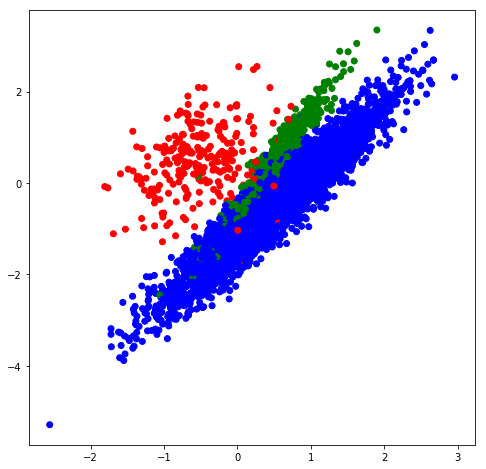

In [9]:
colors = ['red','green','blue']

fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

## 2. 비율에 맞게 트레인,테스트셋 만들기

In [10]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)

In [11]:
Counter(y_dev), Counter(y_test)

(Counter({2: 3411, 1: 388, 0: 201}), Counter({2: 817, 0: 61, 1: 122}))

In [12]:
np.array(list(Counter(y_dev).values())) / len(y_dev)

array([0.85275, 0.097  , 0.05025])

In [13]:
np.array(list(Counter(y_test).values())) / len(y_test)

array([0.817, 0.061, 0.122])

In [14]:
X_dev, X_test, y_dev, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42, stratify=y)

In [15]:
Counter(y_dev), Counter(y_test)

(Counter({0: 210, 2: 3382, 1: 408}), Counter({2: 846, 1: 102, 0: 52}))

In [16]:
np.array(list(Counter(y_dev).values())) / len(y_dev)

array([0.0525, 0.8455, 0.102 ])

In [17]:
np.array(list(Counter(y_test).values())) / len(y_test)

array([0.846, 0.102, 0.052])

## 3. 트레인셋 언더샘플링

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import InstanceHardnessThreshold

from sklearn.ensemble import RandomForestClassifier

In [19]:
Counter(y_dev)

Counter({0: 210, 2: 3382, 1: 408})

In [20]:
rus = InstanceHardnessThreshold(estimator=RandomForestClassifier(n_estimators=100))
X_resampled, y_resampled = rus.fit_sample(X_dev, y_dev)

In [21]:
Counter(y_resampled)

Counter({0: 210, 1: 213, 2: 2000})

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score

In [23]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred,  target_names=["0","1","2"]))

Accuracy : 0.926
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        52
           1       0.93      0.36      0.52       102
           2       0.93      1.00      0.96       846

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.91      0.75      0.79      1000
weighted avg       0.93      0.93      0.91      1000



C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [24]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred, target_names=["0","1","2"]))

Accuracy : 0.93
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.93      0.39      0.55       102
           2       0.93      1.00      0.96       846

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.76      0.81      1000
weighted avg       0.93      0.93      0.92      1000



C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


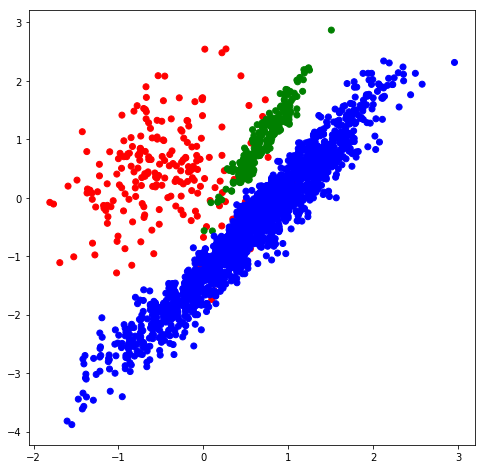

In [25]:
colors = ['red','green','blue']

fig = plt.figure(figsize=(8,8))
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=y_resampled, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

## 4. 트레인셋 오버샘플링

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
Counter(y_dev)

Counter({0: 210, 2: 3382, 1: 408})

In [28]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_dev, y_dev)

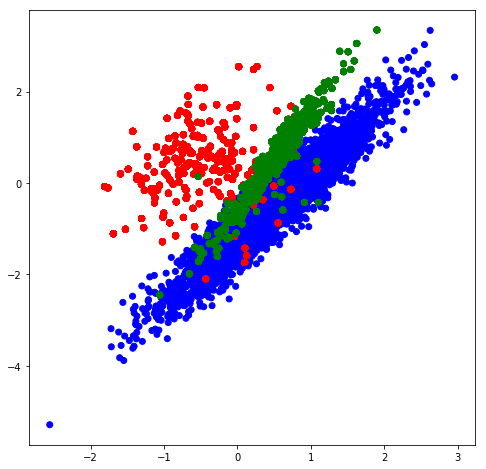

In [29]:
colors = ['red','green','blue']

fig = plt.figure(figsize=(8,8))
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=y_resampled, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [30]:
Counter(y_resampled)

Counter({0: 3382, 2: 3382, 1: 3382})

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score

In [32]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred,  target_names=["0","1","2"]))

Accuracy : 0.917
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        52
           1       0.65      0.82      0.73       102
           2       0.98      0.93      0.95       846

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.78      0.89      0.82      1000
weighted avg       0.93      0.92      0.92      1000



C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [33]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred, target_names=["0","1","2"]))

Accuracy : 0.93
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.93      0.39      0.55       102
           2       0.93      1.00      0.96       846

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.76      0.81      1000
weighted avg       0.93      0.93      0.92      1000



C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_sample(X_dev, y_dev)

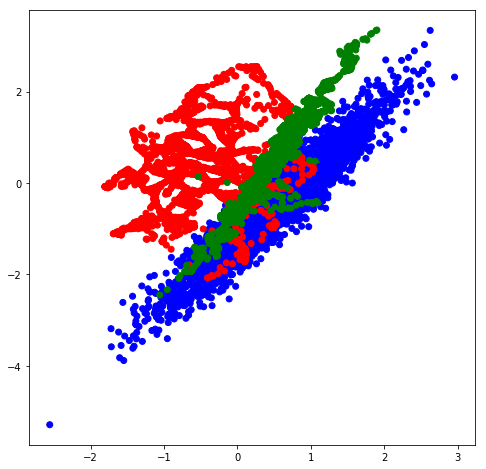

In [36]:
colors = ['red','green','blue']

fig = plt.figure(figsize=(8,8))
plt.scatter(X_resampled[:,0], X_resampled[:,1], c=y_resampled, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [37]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred,  target_names=["0","1","2"]))

Accuracy : 0.922
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        52
           1       0.67      0.85      0.75       102
           2       0.98      0.93      0.96       846

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.78      0.90      0.83      1000
weighted avg       0.93      0.92      0.93      1000



C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [38]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accuracy : {0}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred, target_names=["0","1","2"]))

Accuracy : 0.93
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.93      0.39      0.55       102
           2       0.93      1.00      0.96       846

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.76      0.81      1000
weighted avg       0.93      0.93      0.92      1000



C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
